# Sistemas de recomendación

## Filtro colaborativo.

Se basa en una tabla usuario-item en donde en sus celdas tiene valores de ratings por cada par usuario-item.

La idea es que se pueda ingresar un nuevo usuario y se le predigan los ratings para cada item y luego se le recomendará al usuario los top-k items con mayor rating.


**Notación**
- $r(i,j) = 1$ si el usuario $j$ le dio rating al item $i$.
- $y^{(i,j)}$ rating dado por el usuario $j$ al item $i$.
- $w^{j}$, $b^{j}$ parametros del usuario $j$.
- $x^{i}$ vector de feature para item $i$.

Para usuario $j$ y item $i$, predicir rating  $w^{j} \cdot x^{i} + b^{j}$

$m^{j}$: numero de items que le dio rating al usuario $j$.

y para aprender $w^{j}$ y  $b^{j}$ se puede usar la siguiente funcion de costo:

$$
\min\limits_{w^{(j)}, b^{(j)}}  J(w^{(j)}, b^{(j)}) =\\
\min\limits_{w^{(j)}, b^{(j)}} \frac{1}{2m^{(j)}} \sum\limits_{i:r(i,j)=1} (\underbrace{w^{j} \cdot x^{i} + b^{j}}_{f(x)} - y^{(i,j)})^2 + \frac{\lambda}{2 m^{(j)}} \sum_{k=1}^{n} (w^{(j)}_{k})^2
$$

Pero tambien se tiene que aprender $x^{(i)}$ que se hace de la misma forma, juntando todo se tiene:

$$
\min\limits_{\substack{w^{(1)},..., w^{(n_u)}\\ b^{(1)},..., b^{(n_u)}\\ x^{(1)},..., x^{(n_m)}}}  J(w, b, x) 
=
\min\limits_{w^{(j)}, b^{(j)}} \frac{1}{2m^{(j)}} \sum\limits_{(i,j):r(i,j)=1} (w^{j} \cdot x^{i} + b^{j} - y^{(i,j)})^2 
+ 
\frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^{n} (w^{(j)}_{k})^2
+ 
\frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^{n} (x^{(i)}_{k})^2
$$

### Entrenamiento
Y la actualizacion de parametros es la siguiente:

$$
w_i^{(j)} = w_i^{(j)} - \alpha \frac{\partial}{\partial w_i^{(j)}} J(w, b, x)
\\
b_i^{(j)} = b_i^{(j)} - \alpha \frac{\partial}{\partial b_i^{(j)}} J(w, b, x)
\\
x_i^{(i)} = x_i^{(i)} - \alpha \frac{\partial}{\partial x_i^{(i)}} J(w, b, x)
$$

En general podemos pensarlo como $\theta = [w, b]$ entonces

$$
\theta = \theta - \alpha \frac{\partial}{\partial \theta} J(w, b, x)
\\
\frac{\partial}{\partial \theta} J(w, b, x) = ((X \theta^T - Y)\odot R)^T X + \lambda \theta
\\
X = X - \alpha \frac{\partial}{\partial X} J(w, b, x)
\\
\frac{\partial}{\partial X} J(w, b, x) = ((X \theta^T - Y)\odot R) \theta + \lambda X
$$

### Inferencia

Para la inferencia no solo se devuelve $f(x)$ sino que se contempla el caso en donde haya poca informacion al respecto sobre los ratings, en ese caso se debe ponderar con el promedio, siendo $p$ n hiper-parametro que da pondera la prediccion con el promedio.

$$
Y_{\text{pred}} = p \cdot (\underbrace{X \theta^T}_{f(x)}) + (1-p) \cdot <Y>
$$

In [1]:
!curl -O https://raw.githubusercontent.com/mvera1412/tallerPS/main/data/movies.csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('movies.csv')
print(df.head())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3148k  100 3148k    0     0  5748k      0 --:--:-- --:--:-- --:--:-- 5745k


/home/brian/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


                 Name  user_0  user_1  user_2  user_3  user_4  user_5  user_6  \
0    Toy Story (1995)       5       4       0       0       4       4       0   
1    GoldenEye (1995)       3       0       0       0       3       0       0   
2   Four Rooms (1995)       4       0       0       0       0       0       0   
3   Get Shorty (1995)       3       0       0       0       0       0       5   
4      Copycat (1995)       3       0       0       0       0       0       0   

   user_7  user_8  ...  user_933  user_934  user_935  user_936  user_937  \
0       0       0  ...         2         3         4         0         4   
1       0       0  ...         4         0         0         0         0   
2       0       0  ...         0         0         4         0         0   
3       0       0  ...         5         0         0         0         0   
4       0       0  ...         0         0         0         0         0   

   user_938  user_939  user_940  user_941  user_942  
0 

In [2]:
new_user = pd.DataFrame(columns=["Name","Rating"])

# Algunas las escribo incompletas para probar el buscador
new_user.loc[len(new_user)] = ["Toy Story",4]
new_user.loc[len(new_user)] = ["Babe",1]
new_user.loc[len(new_user)] = ["Batman Forever",2]
new_user.loc[len(new_user)] = ["Star Wars",5]
new_user.loc[len(new_user)] = ["Lion King",5]
new_user.loc[len(new_user)] = ["Jurassic Park",4]
new_user.loc[len(new_user)] = ["Die Hard",2]
new_user.loc[len(new_user)] = ["Terminator",5]
new_user.loc[len(new_user)] = ["Men in Black",3]
new_user.loc[len(new_user)] = ["Mario",2]
print(new_user)

             Name  Rating
0       Toy Story       4
1            Babe       1
2  Batman Forever       2
3       Star Wars       5
4       Lion King       5
5   Jurassic Park       4
6        Die Hard       2
7      Terminator       5
8    Men in Black       3
9           Mario       2


In [3]:
import os
path = "../data/"
if not os.path.exists(path + "glove.6B.300d.txt"):
  !wget http://nlp.stanford.edu/data/glove.6B.zip --no-check-certificate
  !unzip glove.6B.zip

In [4]:
import re
class MovieSearcher():
  def __init__(self,encodding_file,movies_list):
    self.language_model = {}
    with open(encodding_file, encoding="utf-8") as f:
      for line in f:
          parts = line.strip().split()
          word = parts[0]
          vec = np.array(parts[1:], dtype=float)
          self.language_model[word] = vec
    self.dim_ftx = self.language_model[word].shape[0] # Averiguo la dimensión de las representaciones
    self.movies_list = movies_list
    self.last_movie=None

  def _word2vec(self,w):
    return self.language_model.get(w,np.zeros(self.dim_ftx))

  def _title2vec(self,title):
    Split = re.sub(r'[^\w\s]', '', title.lower()).strip().split()
    return np.sum([self._word2vec(w) for w in Split],axis=0)

  def _cosine_similarity(self,u,v):
    return u @ v / (np.linalg.norm(u) * np.linalg.norm(v))

  def transform(self,title):
    dataset_vec = np.empty((len(self.movies_list),self.dim_ftx)) # Vector de peliculas
    metrica = np.empty(len(self.movies_list))
    for k, movie in enumerate(self.movies_list):
        dataset_vec[k] = self._title2vec(movie)
        movie_vec = self._title2vec(title)
        metrica[k] = self._cosine_similarity(dataset_vec[k],movie_vec)
    kopt = np.argmax(metrica)
    self.last_movie = self.movies_list[kopt]
    return kopt

In [5]:
buscador = MovieSearcher(path + "glove.6B.300d.txt",df["Name"])

user_name = "Yo"
df[user_name]=np.zeros(len(df),dtype="int")
for k in range(len(new_user)):
  kopt = buscador.transform(new_user.iloc[k,0])
  df.loc[kopt,user_name]=new_user.loc[k,"Rating"]
  print(buscador.last_movie)

Y = np.array(df.iloc[:, 1:]) # Matriz con los datos de los usuarios

 Toy Story (1995)
 Babe (1995)
 Batman Forever (1995)
 Star Wars (1977)
 Lion King, The (1994)
 Jurassic Park (1993)
 Die Hard (1988)
 Terminator, The (1984)
 Men in Black (1997)
 Super Mario Bros. (1993)


In [6]:
df.head()

,Name,user_0,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,user_934,user_935,user_936,user_937,user_938,user_939,user_940,user_941,user_942,Yo
0,Toy Story (1995),5,4,0,0,4,4,0,0,0,...,3,4,0,4,0,0,5,0,0,4
1,GoldenEye (1995),3,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
2,Four Rooms (1995),4,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
3,Get Shorty (1995),3,0,0,0,0,0,5,0,0,...,0,0,0,0,0,2,0,0,0,0
4,Copycat (1995),3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from model import MatrixFactorization
from evaluate import evaluatorMF
from dataloader import RatingDataset
from torch.utils.data import DataLoader


num_users = df.shape[0]
num_items = df.shape[1]-1
latent_dim = 15  # dimensión latente



dataset = RatingDataset(df.values[:, 1:].astype(float))
train_loader = DataLoader(dataset, batch_size=1, shuffle=False)

modelCF = MatrixFactorization(num_users, num_items, latent_dim)
modelCF.fit(train_loader, epochs=1, lr=1e-3, reg=1e-2, history=True)


Epoch 1/1  Loss=12.7824


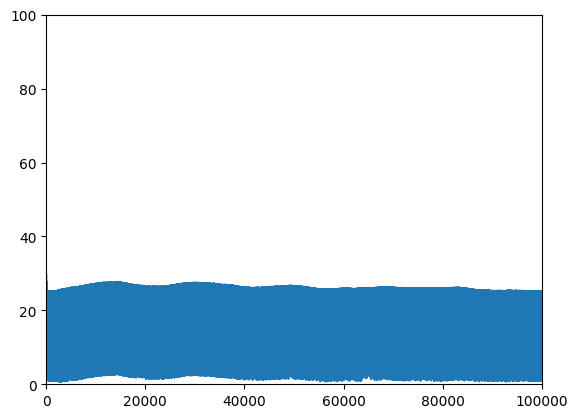

In [15]:
plt.plot(modelCF.history())
plt.axis([0, len(modelCF.history()), 0, 100])
plt.show()

In [16]:
evalCF = evaluatorMF(model = modelCF, device="cpu")
evalCF.evaluate_ratings(train_loader)

{'MSE': 13.725247383117676,
 'RMSE': 3.7047600746154785,
 'MAE': 3.5295495986938477}